In [1]:
import numpy as np, healpy as hp, curvedsky, prjlib, plottools as pl, quad_func, binning as bn, tools_qrec, pickle
from matplotlib.pyplot import *

In [2]:
p0 = prjlib.init_analysis(wtype='Lmask',fltr='none',dtype='dr2_nilc')
p1 = prjlib.init_analysis(wtype='LmaskN18',fltr='none',dtype='dr2_nilc')
qtau0, __, __, qtbh0, qtBH0 = tools_qrec.init_quad(p0.ids,p0.stag,mfmax=100,n0max=50,rlmin=100,rlmax=2048)
qtau1, __, __, qtbh1, qtBH1 = tools_qrec.init_quad(p1.ids,p1.stag,mfmax=100,n0max=50,rlmin=100,rlmax=2048)

In [3]:
d18cmb = prjlib.data_directory()['cmb'] + '/N18/'
D18tau = '/global/homes/t/toshiyan/scratch/PLKold/plk/tderiv/'
#D18tau = '/global/homes/t/toshiyan/scratch/PLKold/tderiv/'
L, Al18 = np.loadtxt(D18tau+'Al1d_nilc_Lmask1_l100-2048_oL1-2048.dat',unpack=True)
L, N018 = np.loadtxt(D18tau+'N0_nilc_Lmask1_l100-2048.dat',unpack=True)
L, ct18, vt18 = np.loadtxt(D18tau+'ctt_nilc_Lmask1_l100-2048_oL1-2048.dat',unpack=True,usecols=(0,1,2))
L, mf18 = np.loadtxt(D18tau+'../tlm/ml_nilc_Lmask1_l100-2048_oL1-2048_1.dat',unpack=True,usecols=(0,1))
L, cr18 = np.loadtxt(D18tau+'../tlm/ctt_nilc_Lmask1_l100-2048_oL1-2048_real.dat',unpack=True,usecols=(0,1))

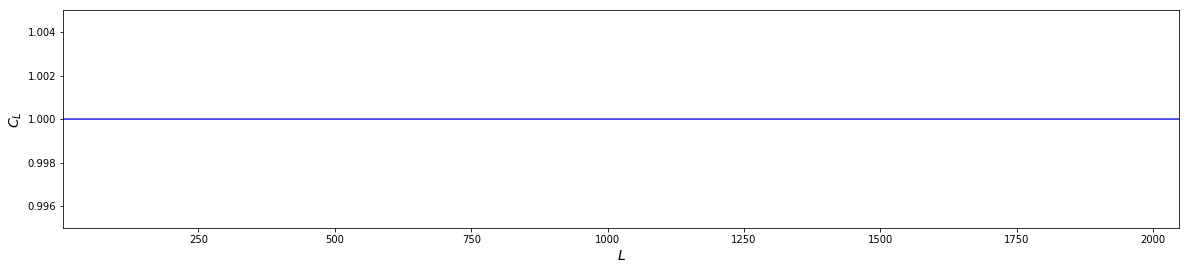

In [4]:
l18, lcl18 = np.loadtxt(prjlib.data_directory()['root']+'/input/aps_N18.dat',unpack=True,usecols=(0,1))
lcl18 *= 2*np.pi/l18/(l18+1)/2.726e6**2
pl.plot_1dstyle(fsize=[20,4],ymin=0.995,ymax=1.005,xmin=2,xmax=2048)
plot(l18[:p0.lmax-1],lcl18[:p0.lmax-1]/p0.lcl[0][2:p0.lmax+1])

In [5]:
ocl18 = 0*p0.lcl[0]
ocl18[1:p0.lmax+1] = np.loadtxt(d18cmb+'aps_sim_1d_nilc_Lmask1.dat',unpack=True)[4,:p0.lmax]
ocl = np.loadtxt(p1.fcmb.scl,unpack=True)[4]

In [6]:
AL18 = curvedsky.norm_tau.qtt(p1.lmax,100,2048,p0.lcl[0,:],ocl18)
AL = curvedsky.norm_tau.qtt(p1.lmax,100,2048,p0.lcl[0,:],ocl)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
No handles with labels found to put in legend.


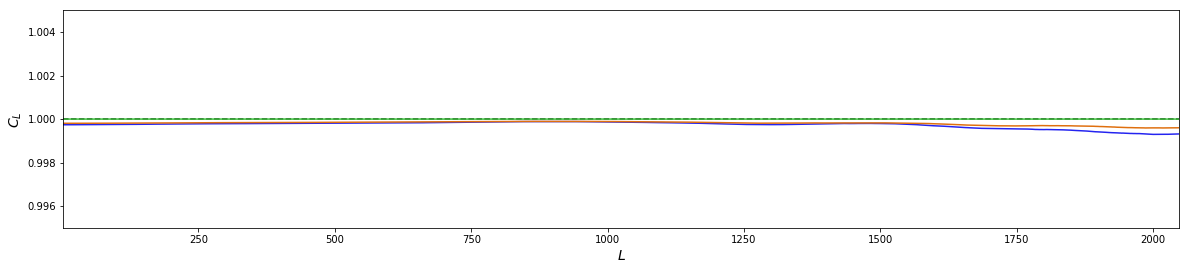

In [7]:
for qobj in [qtau1]:
    al = (np.loadtxt(qobj.f['TT'].al)).T[1]
    pl.plot_1dstyle(fsize=[20,4],ymin=0.995,ymax=1.005,xmin=2,xmax=2048)
    axhline(1,color='k',ls='--')
    plot(qobj.l[1:],Al18[0:p1.lmax]/al[1:])
    plot(qobj.l,AL18/al)
    plot(qobj.l,AL/al)
    legend()
    show()

No handles with labels found to put in legend.


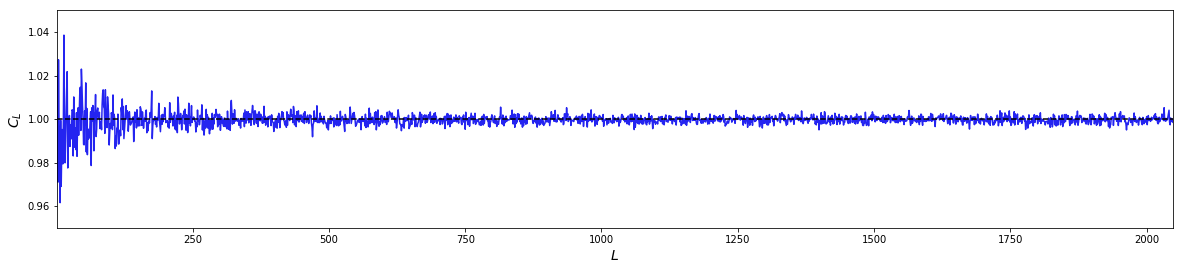

In [8]:
for qobj in [qtau1]:
    n0 = (np.loadtxt(qobj.f['TT'].n0bs)).T[1]
    pl.plot_1dstyle(fsize=[20,4],ymin=0.95,ymax=1.05,xmin=1,xmax=2048)
    plot(qobj.l[1:],N018[0:p1.lmax]/n0[1:])
    legend()
    axhline(1,color='k',ls='--')
    show()

No handles with labels found to put in legend.


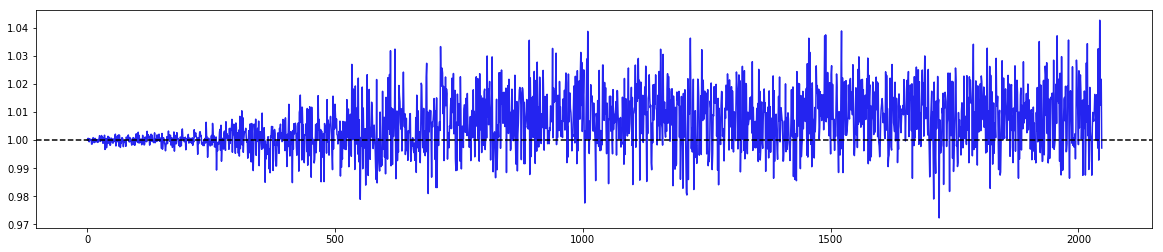

In [9]:
for qobj in [qtau1]:
    mf = (np.loadtxt(qobj.f['TT'].ml[0])).T[1]
    #pl.plot_1dstyle(fsize=[20,4],ymin=0.95,ymax=1.05,xmin=1,xmax=200)
    plot(mf18[:p0.lmax]/mf[1:])
    axhline(1,color='k',ls='--')
    legend()
    show()

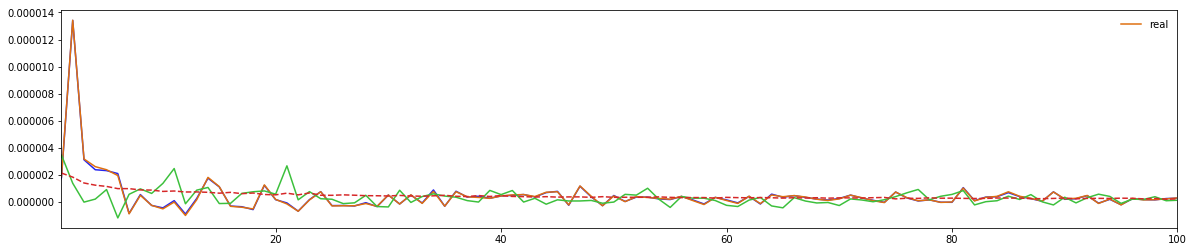

In [10]:
for qobj in [qtau1]:
    cl = (np.loadtxt(qobj.f['TT'].cl[0])).T[1]
    rd = (np.loadtxt(qobj.f['TT'].rdn0[0])).T[1]
    sl = np.array( [ (np.loadtxt(qobj.f['TT'].cl[i])).T[1] for i in range(1,20) ] )
    #plot(qobj.l,np.mean(sl,axis=0),'r',label='real')
    #plot(L,ct18)
    xlim(1,100)
    plot(qobj.l,(cl-rd-n0/qobj.mfsim))
    plot(L,cr18,label='real')
    plot(qobj.l,(sl[0]-n0))
    plot(L,vt18,ls='--')
    legend()

In [11]:
alm0 = pickle.load(open(qtau1.f['TT'].alm[0],"rb"))[0] - pickle.load(open(qtau1.f['TT'].mfb[0],"rb"))[0]
alm1 = pickle.load(open(qtau1.f['TT'].alm[1],"rb"))[0] - pickle.load(open(qtau1.f['TT'].mfb[1],"rb"))[0]
alm0[3:,:] = 0.
alm1[3:,:] = 0.
alm0[:1,:] = 0.
alm1[:1,:] = 0.
map0 = curvedsky.utils.hp_alm2map(128,p1.lmax,p1.lmax,alm0)
map1 = curvedsky.utils.hp_alm2map(128,p1.lmax,p1.lmax,alm1)

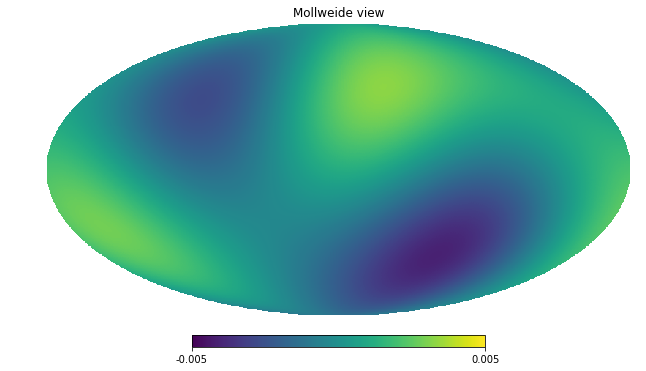

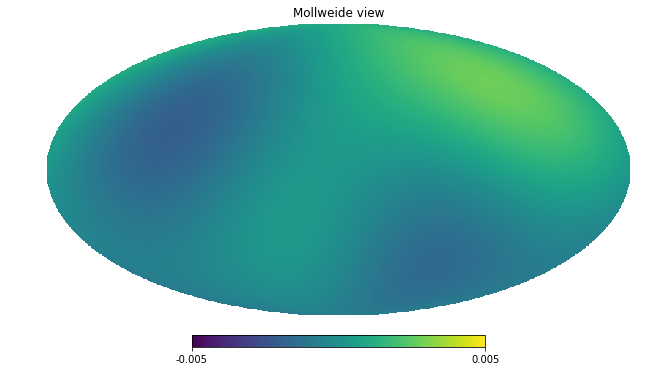

In [12]:
hp.mollview(map0,min=-5e-3,max=5e-3)
hp.mollview(map1,min=-5e-3,max=5e-3)

#### Mean-field spectrum, raw spectrum and RDN0

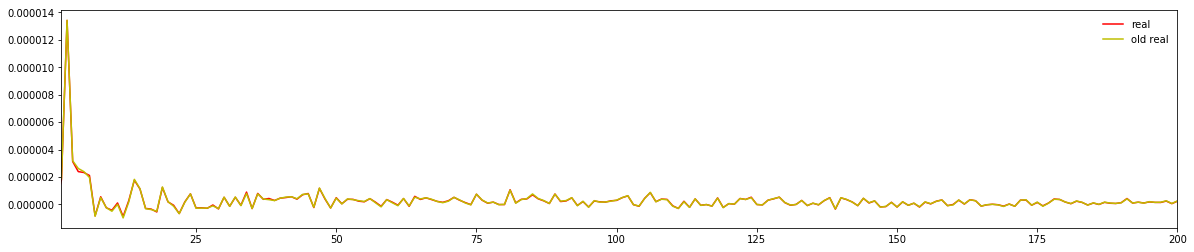

In [13]:
#for qobj in [qtau0,qtau1,qtBH0,qtBH1]:
for qobj in [qtau1]:
    ml = (np.loadtxt(qobj.f['TT'].ml[0])).T[1]
    cl = (np.loadtxt(qobj.f['TT'].cl[0])).T[1]
    sl = np.array( [ (np.loadtxt(qobj.f['TT'].cl[i])).T[1] for i in range(1,20) ] )
    n0 = (np.loadtxt(qobj.f['TT'].n0bs)).T[1]
    rd = (np.loadtxt(qobj.f['TT'].rdn0[0])).T[1]
    #pl.plot_1dstyle(fsize=[10,3],ymin=1e-6,ymax=1e-4,xmin=0,xmax=100,ylog=True)
    xlim(1,200)
    plot(qobj.l,cl-rd-n0/(qobj.mfsim),'r',label='real')
    plot(L,cr18,color='y',label='old real')
    #errorbar(qobj.l,np.mean(sl,axis=0)-n0-n0/(qobj.mfsim-1),yerr=np.std(sl,axis=0),color='k',ls='--',label='sim')
    #errorbar(L,ct18,color='k',yerr=vt18,label='old,sim')
    legend()
    show()

In [14]:
Lb, ct18b, vt18b = np.loadtxt(D18tau+'ctt_nilc_Lmask1_l100-2048_oL1-2048_b20.dat',unpack=True,usecols=(0,1,2))
Lb, cr18b = np.loadtxt(D18tau+'../tbin/ctt_nilc_Lmask1_l100-2048_oL1-2048_b20_real.dat',unpack=True,usecols=(0,1))

In [15]:
mb = bn.multipole_binning(20,lmin=1,lmax=2048)
Cr18b = bn.binning(np.insert(cr18,0,[0]),mb,vl=np.insert(vt18,0,[0]))

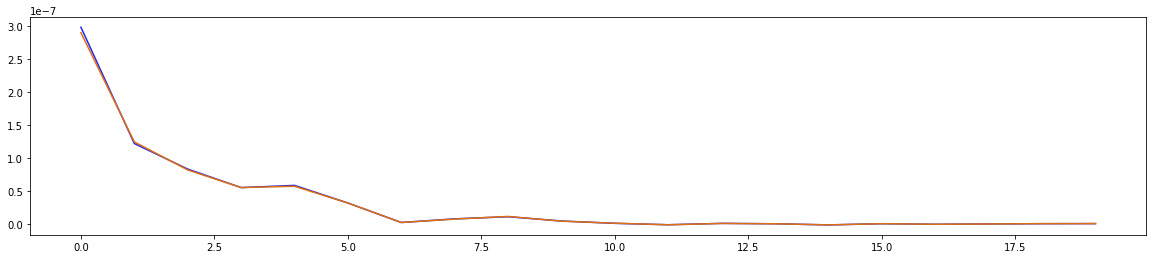

In [16]:
plot(Cr18b)
plot(cr18b)

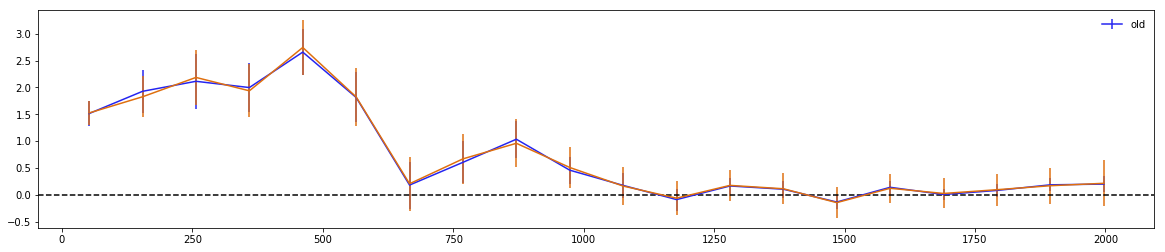

In [19]:
s  = mb.bc * 1e5
for qobj in [qtau1]:
    sb, vb, ci, cb, vl = bn.binned_spec(mb,qobj.f['TT'].cl,cn=1,doreal=True,opt=True)
    n0 = (np.loadtxt(qobj.f['TT'].n0bs)).T[1]
    #rd = np.array( [ (np.loadtxt(qobj.f['TT'].rdn0[i])).T[1] for i in p0.rlz ] )
    nb = bn.binning(n0,mb,vl=vl)
    rd = (np.loadtxt(qobj.f['TT'].rdn0[0])).T[1]
    rb = bn.binning(rd,mb,vl=vl)
    errorbar(Lb,s*cr18b,yerr=s*vt18b,label='old')
    errorbar(mb.bc,s*(cb-rb-nb/(qobj.mfsim)),yerr=s*vb)
    axhline(0,color='k',ls='--')
    legend()
    show()

<ErrorbarContainer object of 3 artists>

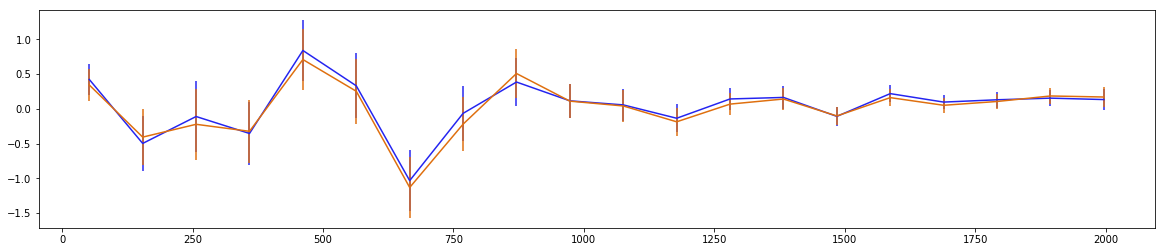

In [20]:
s = Lb*1e5
errorbar(mb.bc,s*(cb-rb-nb/(qobj.mfsim)-(sb-nb-nb/(qobj.mfsim-1))),yerr=s*vt18b)
errorbar(Lb,s*(cr18b-ct18b),yerr=s*vt18b)